# analiza_datos_SinPresionTminmax_1.0

para analizar en primera instancia las distancias incidente-estacion, se genera un fichero que contenga la fecha,id_incidente,id_persona,coordenadas_incidente,estacion,coordenadas_estacion. de esta manera se tratara de establecer un criterio por el cual una distancia comienza a ser "demasiado grande".

In [1]:
import pandas as pd
df_dist=pd.read_csv('../../DATASETS/AHOGADOS/CSV/historico_incidentes_estaciones_meteoSinPresionTminmax.csv',sep='|',error_bad_lines=False)
df_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 41 columns):
Fecha               6482 non-null object
IdAhogado           6482 non-null int64
IdPersona           6482 non-null int64
Localidad           6482 non-null object
Provincia           6482 non-null object
CCAA                6482 non-null object
Hora                5381 non-null object
Latitud             6482 non-null float64
Longitud            6482 non-null float64
Sexo                6481 non-null object
Edad                5366 non-null float64
Nacionalidad        6482 non-null object
Origen              6482 non-null object
Extraccion          6482 non-null object
Causa               6482 non-null object
TipoAhogamiento     6482 non-null object
Factor              6482 non-null object
Intervencion        6482 non-null object
Pronostico          6482 non-null object
Localizacion        6482 non-null object
Riesgo              6482 non-null object
Reanimacion         6482 non-nu

In [2]:
df_dist=df_dist[['Fecha','IdAhogado','IdPersona','Vigilancia','Pronostico','Localidad','Provincia','CCAA','Latitud','Longitud','Sexo','Edad','ID','Estacion','Latitud_y','Longitud_y','Distancia']]

In [3]:
df_dist['Mes'] = df_dist['Fecha'].str.slice(3, 5).astype(float)

In [4]:
df_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 18 columns):
Fecha         6482 non-null object
IdAhogado     6482 non-null int64
IdPersona     6482 non-null int64
Vigilancia    6482 non-null object
Pronostico    6482 non-null object
Localidad     6482 non-null object
Provincia     6482 non-null object
CCAA          6482 non-null object
Latitud       6482 non-null float64
Longitud      6482 non-null float64
Sexo          6481 non-null object
Edad          5366 non-null float64
ID            6482 non-null int64
Estacion      6482 non-null object
Latitud_y     6482 non-null float64
Longitud_y    6482 non-null float64
Distancia     6482 non-null float64
Mes           6482 non-null float64
dtypes: float64(7), int64(3), object(8)
memory usage: 911.6+ KB


In [5]:
df_dist.head()

,Fecha,IdAhogado,IdPersona,Vigilancia,Pronostico,Localidad,Provincia,CCAA,Latitud,Longitud,Sexo,Edad,ID,Estacion,Latitud_y,Longitud_y,Distancia,Mes
0,01/01/2013,144,166,No vigilado,Ahogamiento mortal,IZNAJAR,CORDOBA,ANDALUCIA,0.650319,-0.075250,Hombre,19.0,8419,GRANADA/AEROPUERTO,0.648972,-0.066032,47.562655,1.0
1,09/01/2013,146,168,En horario de vigilancia,Ahogamiento mortal,PUERTO DE LA CRUZ,TENERIFE,CANARIAS,0.495824,-0.288784,Hombre,59.0,8451,JEREZ DE LA FRONTERA AEROPUERTO,0.641409,-0.105883,1349.441373,1.0
2,05/01/2013,147,169,Sin datos,Ahogamiento mortal,ARRECIFE,LANZAROTE,CANARIAS,0.504845,-0.237980,Hombre,44.0,8451,JEREZ DE LA FRONTERA AEROPUERTO,0.641409,-0.105883,1120.630572,1.0
3,05/01/2013,148,170,En horario de vigilancia,Ahogamiento mortal,SAN BARTOLOME DE TIRAJANA,GRAN CANARIA,CANARIAS,0.484508,-0.271814,Hombre,67.0,8451,JEREZ DE LA FRONTERA AEROPUERTO,0.641409,-0.105883,1339.953401,1.0
4,06/01/2013,150,172,En horario de vigilancia,Ahogamiento mortal,PLAYA DEL INGLES,GRAN CANARIA,CANARIAS,0.484488,-0.271640,Hombre,67.0,8451,JEREZ DE LA FRONTERA AEROPUERTO,0.641409,-0.105883,1339.428023,1.0


In [6]:
df_dist.describe()

,IdAhogado,IdPersona,Latitud,Longitud,Edad,ID,Latitud_y,Longitud_y,Distancia,Mes
count,6482.000000,6482.000000,6482.000000,6482.000000,5366.000000,6482.000000,6482.000000,6482.000000,6482.000000,6482.000000
mean,3630.986115,3683.081148,0.669950,-0.085181,45.465710,8259.942147,0.694037,-0.061626,220.744447,6.949553
std,1709.342163,1923.959418,0.085231,0.100440,24.295928,164.539786,0.043214,0.062989,457.963512,2.644395
min,144.000000,166.000000,0.479417,-0.337162,-1.000000,8001.000000,0.628319,-0.162165,0.097236,1.000000
25%,2045.000000,2051.250000,0.641934,-0.145218,25.000000,8064.250000,0.650717,-0.120719,10.325282,6.000000
50%,3854.500000,3700.500000,0.689536,-0.069341,47.000000,8303.000000,0.689405,-0.066613,22.524644,7.000000
75%,5086.750000,5346.750000,0.738028,-0.005731,67.000000,8383.000000,0.736820,-0.008727,51.477272,8.000000
max,6360.000000,6985.000000,0.810914,0.282519,96.000000,8492.000000,0.764202,0.073886,1671.782368,12.000000


In [7]:
df_dist_peninsula=df_dist[df_dist.CCAA != 'CANARIAS']
df_dist_peninsula=df_dist_peninsula[df_dist_peninsula.CCAA != 'CEUTA']
df_dist_peninsula=df_dist_peninsula[df_dist_peninsula.CCAA != 'MELILLA']

In [8]:
df_dist_peninsula.describe()

,IdAhogado,IdPersona,Latitud,Longitud,Edad,ID,Latitud_y,Longitud_y,Distancia,Mes
count,5418.000000,5418.000000,5418.000000,5418.000000,4469.000000,5418.000000,5418.000000,5418.000000,5418.000000,5418.000000
mean,3686.807124,3753.806017,0.703336,-0.050410,45.456702,8231.803618,0.703341,-0.050830,23.700043,6.976190
std,1707.639840,1921.568843,0.041768,0.064242,24.672587,165.325395,0.041202,0.063085,24.181108,2.483987
min,144.000000,166.000000,0.539029,-0.172804,-1.000000,8001.000000,0.628319,-0.162165,0.097236,1.000000
25%,2111.250000,2136.250000,0.669241,-0.103744,24.000000,8045.000000,0.669330,-0.104099,8.442392,6.000000
50%,3910.000000,3810.500000,0.699710,-0.046333,47.000000,8261.000000,0.697259,-0.043813,17.666394,7.000000
75%,5128.000000,5396.750000,0.742434,-0.001895,68.000000,8373.000000,0.740601,-0.006690,32.161583,8.000000
max,6360.000000,6985.000000,0.810914,0.153633,96.000000,8492.000000,0.764202,0.073886,750.045157,12.000000


In [9]:
df_dist_peninsula_Masc=df_dist_peninsula[df_dist_peninsula.Sexo != 'Mujer']
df_dist_peninsula_Fem=df_dist_peninsula[df_dist_peninsula.Sexo != 'Hombre']

In [10]:
df_dist_peninsula_Masc.describe()

,IdAhogado,IdPersona,Latitud,Longitud,Edad,ID,Latitud_y,Longitud_y,Distancia,Mes
count,4146.00000,4146.000000,4146.000000,4146.000000,3332.000000,4146.000000,4146.000000,4146.000000,4146.000000,4146.000000
mean,3679.55234,3754.030632,0.703948,-0.051690,45.245498,8229.163531,0.703959,-0.052091,24.165443,6.954173
std,1718.70533,1930.988404,0.042103,0.064068,24.230550,166.570783,0.041481,0.062858,24.629183,2.522913
min,144.00000,166.000000,0.539029,-0.172804,-1.000000,8001.000000,0.628319,-0.162165,0.097236,1.000000
25%,2085.50000,2120.250000,0.669257,-0.103998,25.000000,8044.000000,0.669625,-0.105302,8.463568,6.000000
50%,3923.50000,3830.000000,0.701465,-0.047869,46.000000,8241.000000,0.699295,-0.047415,17.993919,7.000000
75%,5131.00000,5413.000000,0.743228,-0.002299,67.000000,8373.000000,0.740892,-0.006690,32.884813,8.000000
max,6359.00000,6984.000000,0.810914,0.153633,96.000000,8492.000000,0.764202,0.073886,750.045157,12.000000


In [11]:
df_dist_peninsula_Fem.describe()

,IdAhogado,IdPersona,Latitud,Longitud,Edad,ID,Latitud_y,Longitud_y,Distancia,Mes
count,1503.000000,1503.000000,1503.000000,1503.000000,1182.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,3808.421158,3888.741184,0.700117,-0.043805,44.949239,8245.791750,0.700031,-0.044315,21.981855,7.111111
std,1684.107450,1871.697527,0.039843,0.063391,26.139063,158.132152,0.039438,0.062431,21.978997,2.300125
min,157.000000,179.000000,0.623389,-0.161570,-1.000000,8001.000000,0.628319,-0.160755,0.134837,1.000000
25%,2196.500000,2232.000000,0.669810,-0.098459,20.000000,8077.500000,0.669625,-0.098815,8.033453,6.000000
50%,4218.000000,4079.000000,0.694973,-0.028915,47.000000,8284.000000,0.693167,-0.028507,16.577701,7.000000
75%,5134.000000,5426.500000,0.737865,0.001011,70.000000,8370.000000,0.736820,-0.001164,28.339513,8.000000
max,6360.000000,6985.000000,0.764033,0.145162,95.000000,8487.000000,0.764202,0.073886,487.279280,12.000000


In [12]:
df_dist_peninsula_0_20 = df_dist_peninsula[(df_dist_peninsula['Edad'] >= 0) & (df_dist_peninsula['Edad'] <= 20)]
df_dist_peninsula_20_60 = df_dist_peninsula[(df_dist_peninsula['Edad'] >= 21) & (df_dist_peninsula['Edad'] <= 60)]
df_dist_peninsula_60_max = df_dist_peninsula[(df_dist_peninsula['Edad'] >= 61)]

In [13]:
df_dist_peninsula_0_20.describe()

,IdAhogado,IdPersona,Latitud,Longitud,Edad,ID,Latitud_y,Longitud_y,Distancia,Mes
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,3626.843972,3635.241135,0.701335,-0.048314,11.204661,8240.574468,0.701394,-0.048524,22.857316,6.776089
std,1693.866612,1892.076326,0.041812,0.059981,5.899828,162.111959,0.041226,0.059588,20.083564,2.078948
min,144.000000,166.000000,0.617696,-0.161644,0.000000,8001.000000,0.628319,-0.162165,0.429676,1.000000
25%,2006.000000,2109.500000,0.666427,-0.095951,6.000000,8048.000000,0.668170,-0.098611,8.795734,6.000000
50%,3761.000000,3361.000000,0.697547,-0.051161,12.000000,8284.000000,0.697259,-0.051196,17.132613,7.000000
75%,4968.000000,5200.000000,0.740907,-0.001884,16.000000,8373.000000,0.740601,-0.006690,28.551831,8.000000
max,6360.000000,6985.000000,0.763575,0.074463,20.000000,8487.000000,0.764202,0.073886,151.175546,12.000000


In [14]:
df_dist_peninsula_20_60.describe()

,IdAhogado,IdPersona,Latitud,Longitud,Edad,ID,Latitud_y,Longitud_y,Distancia,Mes
count,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000
mean,3623.243513,3699.094311,0.704417,-0.051208,42.186128,8227.594311,0.704302,-0.051840,25.500115,6.870259
std,1688.320775,1902.377016,0.042152,0.064469,11.244471,166.148015,0.041417,0.062899,30.811155,2.635472
min,156.000000,178.000000,0.539029,-0.172804,21.000000,8001.000000,0.628319,-0.162165,0.134837,1.000000
25%,2124.250000,2150.250000,0.670598,-0.103942,33.000000,8044.000000,0.669625,-0.105302,8.364305,6.000000
50%,3768.500000,3735.500000,0.702609,-0.048039,43.000000,8238.000000,0.703804,-0.048115,18.792279,7.000000
75%,5044.250000,5291.250000,0.743335,-0.001704,51.000000,8373.000000,0.740892,-0.006690,33.947931,8.000000
max,6359.000000,6984.000000,0.810914,0.153633,60.000000,8492.000000,0.764202,0.073886,750.045157,12.000000


In [15]:
df_dist_peninsula_60_max.describe()

,IdAhogado,IdPersona,Latitud,Longitud,Edad,ID,Latitud_y,Longitud_y,Distancia,Mes
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,3562.714676,3629.806826,0.702011,-0.040978,73.419113,8240.248464,0.702120,-0.041383,22.374388,7.178157
std,1759.485203,2005.110623,0.039003,0.064439,7.361502,158.212353,0.038645,0.063329,18.776475,2.355162
min,154.000000,176.000000,0.628470,-0.160890,61.000000,8001.000000,0.628319,-0.162165,0.097236,1.000000
25%,1945.000000,1840.000000,0.669257,-0.097429,68.000000,8055.000000,0.669625,-0.098611,8.329713,6.000000
50%,3692.000000,3562.000000,0.698638,-0.020433,72.000000,8282.000000,0.697259,-0.017526,17.177780,7.000000
75%,5119.000000,5388.000000,0.737665,0.001618,79.000000,8370.000000,0.736820,-0.001164,31.317612,9.000000
max,6358.000000,6983.000000,0.763410,0.074517,96.000000,8487.000000,0.764202,0.073886,138.642065,12.000000


In [16]:
df_dist_peninsula_dist_0_50 = df_dist_peninsula[(df_dist_peninsula['Distancia'] >= 0) & (df_dist_peninsula['Distancia'] <= 50)]
df_dist_peninsula_dist_50_100 = df_dist_peninsula[(df_dist_peninsula['Distancia'] >= 51) & (df_dist_peninsula['Distancia'] <= 100)]
df_dist_peninsula_dist_100_300 = df_dist_peninsula[(df_dist_peninsula['Distancia'] >= 101) & (df_dist_peninsula['Distancia'] <= 300)]
df_dist_peninsula_dist_300_500 = df_dist_peninsula[(df_dist_peninsula['Distancia'] >= 301) & (df_dist_peninsula['Distancia'] <= 500)]
df_dist_peninsula_dist_500_1000 = df_dist_peninsula[(df_dist_peninsula['Distancia'] >= 501) & (df_dist_peninsula['Distancia'] <= 1000)]
df_dist_peninsula_dist_1000_max = df_dist_peninsula[(df_dist_peninsula['Distancia'] >= 1001)]

In [17]:
df_dist_peninsula_dist_0_50.describe()

,IdAhogado,IdPersona,Latitud,Longitud,Edad,ID,Latitud_y,Longitud_y,Distancia,Mes
count,4820.000000,4820.000000,4820.000000,4820.000000,3966.000000,4820.000000,4820.000000,4820.000000,4820.000000,4820.000000
mean,3813.457676,3888.818465,0.704008,-0.050176,45.519163,8229.007054,0.704062,-0.050344,17.940048,7.013278
std,1694.637721,1915.571645,0.041422,0.064363,24.831518,165.666449,0.041178,0.063500,12.302535,2.505903
min,144.000000,166.000000,0.629096,-0.162388,-1.000000,8001.000000,0.628319,-0.162165,0.097236,1.000000
25%,2235.000000,2278.750000,0.669246,-0.103783,24.000000,8044.000000,0.669625,-0.102974,7.824261,6.000000
50%,4092.500000,3970.500000,0.701515,-0.045054,47.500000,8241.000000,0.701247,-0.043051,15.328634,7.000000
75%,5233.000000,5547.250000,0.742471,-0.002448,68.000000,8373.000000,0.740601,-0.006487,25.639882,8.000000
max,6360.000000,6985.000000,0.767013,0.074851,96.000000,8492.000000,0.764202,0.073886,49.968830,12.000000


In [18]:
df_dist_peninsula_dist_50_100.describe()

,IdAhogado,IdPersona,Latitud,Longitud,Edad,ID,Latitud_y,Longitud_y,Distancia,Mes
count,563.000000,563.000000,563.000000,563.000000,473.000000,563.000000,563.000000,563.000000,563.000000,563.000000
mean,2686.765542,2682.833037,0.698668,-0.052855,44.479915,8251.227353,0.698290,-0.055324,66.289263,6.690941
std,1440.726922,1589.069550,0.043496,0.062492,23.556012,162.016513,0.041122,0.059817,11.972144,2.289627
min,161.000000,206.000000,0.627752,-0.172804,1.000000,8001.000000,0.639954,-0.162165,51.068224,1.000000
25%,1533.500000,1416.000000,0.671898,-0.102857,26.000000,8085.000000,0.668170,-0.105883,55.615296,6.000000
50%,2330.000000,2403.000000,0.692586,-0.053084,45.000000,8284.000000,0.689405,-0.063414,63.432001,7.000000
75%,3489.000000,4072.500000,0.743415,0.001535,64.000000,8373.000000,0.740020,-0.008727,74.601165,8.000000
max,6324.000000,6943.000000,0.764473,0.089288,90.000000,8492.000000,0.760265,0.073886,99.249177,12.000000


In [19]:
df_dist_peninsula_dist_100_300.describe()

,IdAhogado,IdPersona,Latitud,Longitud,Edad,ID,Latitud_y,Longitud_y,Distancia,Mes
count,13.000000,13.000000,13.000000,13.000000,12.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,2150.000000,2106.846154,0.690645,-0.076316,51.166667,8286.538462,0.689632,-0.067402,117.007082,5.769231
std,1326.569008,1334.863591,0.050776,0.056958,24.560994,149.776286,0.041553,0.043930,17.965945,2.488435
min,850.000000,357.000000,0.617696,-0.130348,2.000000,8023.000000,0.639954,-0.105883,101.637055,1.000000
25%,1039.000000,1258.000000,0.654023,-0.114823,41.250000,8171.000000,0.653044,-0.102974,103.777160,5.000000
50%,1718.000000,2101.000000,0.684021,-0.089541,56.000000,8348.000000,0.680388,-0.078249,106.919347,6.000000
75%,2901.000000,2710.000000,0.740840,-0.064407,64.500000,8391.000000,0.726513,-0.066613,138.642065,8.000000
max,4730.000000,4884.000000,0.780389,0.019922,84.000000,8482.000000,0.758636,0.010438,151.175546,9.000000


In [20]:
df_dist_peninsula_dist_300_500.describe()

,IdAhogado,IdPersona,Latitud,Longitud,Edad,ID,Latitud_y,Longitud_y,Distancia,Mes
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,4119.666667,4526.333333,0.768847,0.077573,51.000000,8173.666667,0.728578,0.018520,427.614954,7.333333
std,1208.906255,894.287053,0.038179,0.124476,6.082763,145.774941,0.031504,0.074830,82.729593,3.511885
min,2837.000000,3917.000000,0.736395,-0.066076,47.000000,8023.000000,0.695805,-0.066613,333.173878,4.000000
25%,3560.500000,4013.000000,0.747813,0.039543,47.500000,8103.500000,0.713549,-0.009163,397.782791,5.500000
50%,4284.000000,4109.000000,0.759231,0.145162,48.000000,8184.000000,0.731293,0.048287,462.391705,7.000000
75%,4761.000000,4831.000000,0.785072,0.149397,53.000000,8249.000000,0.744965,0.061087,474.835492,9.000000
max,5238.000000,5553.000000,0.810914,0.153633,58.000000,8314.000000,0.758636,0.073886,487.279280,11.000000


In [21]:
df_dist_peninsula_dist_500_1000.describe()

,IdAhogado,IdPersona,Latitud,Longitud,Edad,ID,Latitud_y,Longitud_y,Distancia,Mes
count,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.0
mean,833.0,2085.0,0.539029,0.024542,30.0,8487.0,0.643154,-0.041597,750.045157,8.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,833.0,2085.0,0.539029,0.024542,30.0,8487.0,0.643154,-0.041597,750.045157,8.0
25%,833.0,2085.0,0.539029,0.024542,30.0,8487.0,0.643154,-0.041597,750.045157,8.0
50%,833.0,2085.0,0.539029,0.024542,30.0,8487.0,0.643154,-0.041597,750.045157,8.0
75%,833.0,2085.0,0.539029,0.024542,30.0,8487.0,0.643154,-0.041597,750.045157,8.0
max,833.0,2085.0,0.539029,0.024542,30.0,8487.0,0.643154,-0.041597,750.045157,8.0


In [22]:
df_dist_peninsula_dist_1000_max.describe()

,IdAhogado,IdPersona,Latitud,Longitud,Edad,ID,Latitud_y,Longitud_y,Distancia,Mes
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

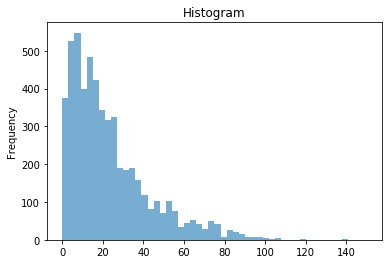

In [24]:
df_dist_peninsula['Distancia'].plot(kind='hist',
        bins=50,
        title='Histogram',
        alpha=0.6,
        range=[0, 150])

In [25]:
df_dist_peninsula['Mortal'].plot(kind='hist',
        bins=2,
        title='Histogram',
        alpha=0.6,
        range=[0, 1])

KeyError: 'Mortal'

In [ ]:
df_dist_peninsula['Mes'].plot(kind='hist',
        bins=13,
        title='Histogram',
        alpha=0.6,
        range=[0, 12])

In [ ]:
#sns.pairplot(df_dist_peninsula, hue="Fecha")
